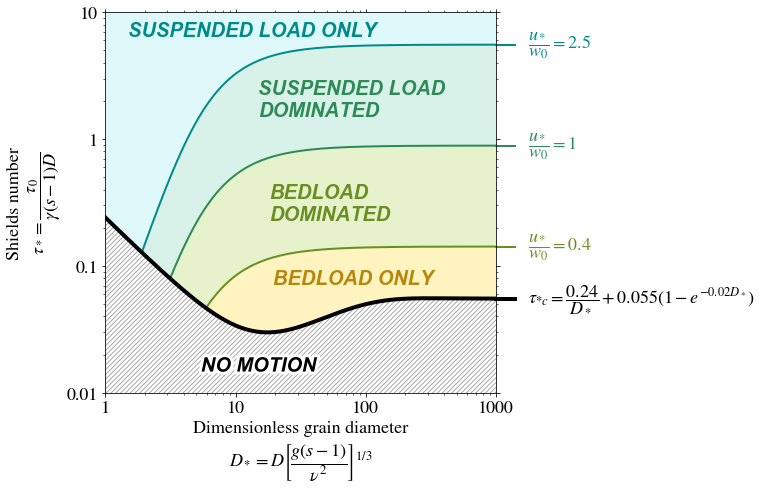

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patheffects as pe
from matplotlib import rc
plt.rcParams.update({'font.size': 18})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rcParams['font.family']=['STIXGeneral','Times New Roman','DejaVu Serif']
mpl.rcParams['mathtext.fontset'] = 'stix'
###################################################################################################
nu = 1.003e-6 # kinematic viscosity, nu (m2/s)
g = 9.81 # gravitational acceleration, g (m/s2)
s = 2.65 # specific gravity of sediment
Dst = np.power(10,np.linspace(-1,4,1001)) # D* values, from 10^-1 to 10^4
###################################################################################################
taustc = 0.24/Dst+0.055*(1-np.exp(-0.02*Dst)) # tau*c
D = Dst/((s-1)*g/nu**2)**(1/3) # diameter, D (m)
w0 = 8*(np.sqrt(1+0.0139*Dst**3)-1)*nu/D # fall velocity, w0 (m/s)
taustBL = (0.4*w0)**2/g/(s-1)/D # boundary between bedload and bedload dominated
tstbl = np.maximum(taustc,taustBL)
taustBL[taustBL<taustc] = np.nan
taustMX = w0**2/g/(s-1)/D # boundary between bedload dominated and suspended load dominated
tstmx = np.maximum(taustc,taustMX)
taustMX[taustMX<taustc] = np.nan
taustSSL = (2.5*w0)**2/g/(s-1)/D # boundary between suspended load dominated and suspended load
tstsl = np.maximum(taustc,taustSSL)
taustSSL[taustSSL<taustc] = np.nan
###################################################################################################
fig,ax = plt.subplots(figsize=(7,7))
ax.fill_between(Dst,tstsl,100, alpha=0.125, ec='None', fc='darkturquoise')
ax.fill_between(Dst,tstmx,tstsl, alpha=0.25, ec='None', fc='mediumaquamarine')
ax.fill_between(Dst,tstbl,tstmx, alpha=0.25, ec='None', fc='yellowgreen')
ax.fill_between(Dst,taustc,taustBL, alpha=0.25, ec='None', fc='gold')
ax.fill_between(Dst,taustc,0.001, hatch='/////', ec='darkgray', fc='None')
plt.loglog(Dst,taustBL, c='olivedrab', lw=2)
plt.loglog(Dst,taustMX, c='seagreen', lw=2)
plt.loglog(Dst,taustSSL, c='darkcyan', lw=2)
plt.loglog(Dst,taustc, 'k', lw=4)
ax.set_xlim((1e0,1e3))
ax.set_ylim((1e-2,1e1))
ax.set_xlabel('Dimensionless grain diameter\n'+
              r'$D_* = D\left[\dfrac{g\left(s-1\right)}{\nu^2}\right]^{1/3}$')
ax.set_ylabel('Shields number\n'+r'$\tau_*=\dfrac{\tau_0}{\gamma\left(s-1\right)D}$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.tick_params(which='both', direction='out', top=True, right=True)
ax.set_axisbelow(True)
ax.text(1.5e1,1.625e-2, 'NO MOTION', fontweight='bold', fontstyle='italic',
        ha='center', va='center', size=20, fontfamily='arial',
        path_effects=[pe.withStroke(linewidth=6, foreground="w")])
ax.text(0.8e2,0.8e-1, 'BEDLOAD ONLY', fontweight='bold', fontstyle='italic',
        ha='center', va='center', size=20, c='darkgoldenrod', fontfamily='arial')
ax.text(1.8e1,4.5e-1, 'BEDLOAD\nDOMINATED', fontweight='bold', fontstyle='italic',
        ha='left', va='top', size=20, c='olivedrab', fontfamily='arial')
ax.text(1.5e1,3e0, 'SUSPENDED LOAD\nDOMINATED', fontweight='bold', fontstyle='italic',
        ha='left', va='top', size=20, c='seagreen', fontfamily='arial')
ax.text(1.5e0,8.5e0, 'SUSPENDED LOAD ONLY', fontweight='bold', fontstyle='italic',
        ha='left', va='top', size=20, c='darkcyan', fontfamily='arial')
###################################################################################################
plt.axhline(y=taustSSL[Dst==1000.], color='darkcyan', lw=2, xmin=1, xmax=1.05, clip_on=False)
ax.text(1750,taustSSL[Dst==1000.], r'$\dfrac{u_*}{w_0}=2.5$', c='darkcyan',
       ha='left', va='center')
plt.axhline(y=taustMX[Dst==1000.], color='seagreen', lw=2, xmin=1, xmax=1.05, clip_on=False)
ax.text(1750,taustMX[Dst==1000.], r'$\dfrac{u_*}{w_0}=1$', c='seagreen',
       ha='left', va='center')
plt.axhline(y=taustBL[Dst==1000.], color='olivedrab', lw=2, xmin=1, xmax=1.05, clip_on=False)
ax.text(1750,taustBL[Dst==1000.], r'$\dfrac{u_*}{w_0}=0.4$', c='olivedrab',
       ha='left', va='center')
plt.axhline(y=taustc[Dst==1000.], color='k', linewidth=4, xmin=1, xmax=1.05, clip_on=False)
ax.text(1750,taustc[Dst==1000.], r'$\tau_{*c}=\dfrac{0.24}{D_*}+0.055\left(1-e^{-0.02D_*}\right)$',
       ha='left', va='center')
###################################################################################################
plt.show()
# fig.savefig("shieldsmodes.pdf", bbox_inches='tight')